Student Name: Chelliah Kanthanathan
Student ID: 18263003

Problem Description: Analyze Sales data. The data has columns that represent the Revenue, Quantity and Gross Margin sales. The key features / input are Revenue and Quantity. The response or continuous output is column Gross Margin
So ideally with input Revenue and Quantity the machine learning algorithm should predict Gross margin

The Data cleaned first to fill the missing values with mean, Then the Data i.e. feature columns are normalized or scaled to represent values between 0 and 1.

Applied K nearest neighbor Regression where as the number of neighbors that result in higher accuracy and lesser error is selected after calculating the accuracy and erros for different number of K values between 1 and 30. Used R2 score accuracy and RMSE error manually to calculate the best K value. Then the same is cross checked with GridSerachCV to check if the Best K value matches the ouput of GridSerachCV validation

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

# LOAD DATA and DESCRIBE DATA

In [15]:
# Load the data
data = pd.read_csv('SuperMarket_Sales_Data.csv')

# Print the first few rows to show the available columns
print (data.head(5))

# Describe the Data, print the mean, SD, Min and Max values for every numerical column
print ("\n", data.describe())

    Product type                    Product    Revenue  Quantity  Gross margin
0   Cooking Gear  TrailChef Deluxe Cook Set   59628.66       489      0.347548
1   Cooking Gear     TrailChef Double Flame   35950.32       252      0.474274
2          Tents                  Star Dome   89940.48       147      0.352772
3          Tents               Star Gazer 2  165883.41       303      0.282938
4  Sleeping Bags            Hibernator Lite  119822.20      1415      0.291450

             Revenue      Quantity  Gross margin
count  8.847500e+04  88475.000000  87894.000000
mean   4.263829e+04    780.586166      0.449718
std    6.578402e+04   1541.645422      0.123642
min    0.000000e+00      1.000000    -12.853678
25%    8.184360e+03    131.000000      0.369880
50%    2.102628e+04    333.000000      0.450634
75%    5.039060e+04    816.000000      0.520130
max    1.635688e+06  67875.000000      0.770476


# DATA CLEANING

In [16]:
# Check if there is any missing values in the numerical column
print ("\n")
print (data.isnull().sum())

# There are 581 missing values in column Gross margin
# Find the mean of column Gross margin and fill it for missing values
mean = data['Gross margin'].mean()
print ("Gross margin", mean)
data['Gross margin'].fillna(mean,inplace=True)



Product type      0
Product           0
Revenue           0
Quantity          0
Gross margin    581
dtype: int64
Gross margin 0.44971769825048824


# DATA PREPRATION

In [17]:
# We could ignore the columns Product type and Product as this does not contain any mumeric data
# Select only few columns that are important for analysis
# These are the features for analysis Revenue and Quantity
feature_cols = ['Revenue', 'Quantity']
X = data[feature_cols]
print ("\nSelected feature shape: ", X.shape)

# Select the column that are response i.e. continuous value or output based 
response_col = 'Gross margin'
y = data[response_col]
print ("Selected response shape: ", y.shape)


Selected feature shape:  (88475, 2)
Selected response shape:  (88475,)


# DATA PREPROCESSING

In [18]:
# Apply Normalization or Scaling to feature columns Revenue and Quantity
# Scale the values of feature columns between 0 to 1. This is important
# for algorithms that use distance measures like K-Nearest Neighbors.
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

## No need to apply Principle Component Analysis as the featurs columns selected are just two

# MODEL TRAINING

In [19]:
# Train the model, Note that the test_size is 0.2 that gives 80% of data for 
# training the model and 20% for testign the model
# Tuned the test_size and random_state to check if the accuracy and 
# error can be better, After checking few test_size 0.2, 0.3 and 0.4 I have found that
# test_size 0.2 results in better accuracy and lesser error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print ("\nSelected feature shape for training the model: ", X_train.shape)
print ("Selected response shape for training the model: ", y_train.shape)
print ("\nSelected feature shape for testing the model: ", X_test.shape)
print ("Selected response shape for testing the model: ",y_test.shape)


Selected feature shape for training the model:  (70780, 2)
Selected response shape for training the model:  (70780,)

Selected feature shape for testing the model:  (17695, 2)
Selected response shape for testing the model:  (17695,)


## CROSS VALIDATION or MODEL EVALUATION


Accuracy for different number of neighbors
[0.3333478368589793, 0.4478223446820473, 0.4596925014887604, 0.4778487038426237, 0.481540951756812, 0.4808101455690057, 0.4807981864331009, 0.47931568480463316, 0.4766211682407048, 0.4749213200531638, 0.47257414771882633, 0.46923515743447075, 0.4656975314641856, 0.46281067370529183, 0.4594468736355738, 0.45631991589868814, 0.45336936384271087, 0.45040184799401906, 0.4475014458213833, 0.4442500507363112, 0.4413588458421026, 0.4394461000641794, 0.4365185129315692, 0.43389334063566665, 0.4312228743811798, 0.429221695202176, 0.42695807926826035, 0.424791415716131, 0.42327109927540074]

Error for different number of neighbors
[0.09565861959160034, 0.08705904068320378, 0.0861182033147033, 0.08465890430805831, 0.08435905231960063, 0.08441848652934683, 0.08441945878095293, 0.08453989631705551, 0.08475835901932365, 0.0848958880324933, 0.0850854244752877, 0.08535432595498887, 0.08563830314005205, 0.08586934507890334, 0.08613777608199182, 0.086386559010

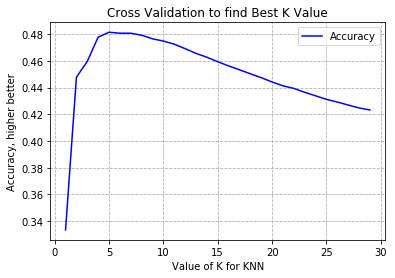

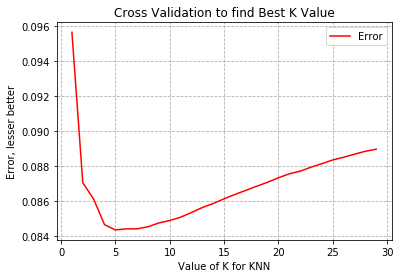

In [20]:
%matplotlib inline
# Select the number of neighbor that give high accuracy and less error
# Check for different K values between 1 to 30, Use RMSE error value
# and r2 score accuracy to decide the best K values
k_range = range(1,30)
k_scores_accuracy = [] # higher means better
k_scores_error = [] # lesser means better
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k) # Try weights = uniform or distance
    trained_model = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_accuracy = metrics.r2_score(y_test,y_pred)
    scores_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    k_scores_accuracy.append(scores_accuracy)
    k_scores_error.append(scores_error)
    
print ("\nAccuracy for different number of neighbors")
print (k_scores_accuracy)
print ("\nError for different number of neighbors")
print (k_scores_error)

# Plot the Accuracy for different K values, Higher the accuracy is better
plt.title("Cross Validation to find Best K Value")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy, higher better')
plt.plot(k_range,k_scores_accuracy,label="Accuracy",color="b")
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

# Plot the RMSE error (Root Mean Square Error) for different K values, lower 
# the error is better
plt.title("Cross Validation to find Best K Value")
plt.xlabel('Value of K for KNN')
plt.ylabel('Error, lesser better')
plt.plot(k_range,k_scores_error,label="Error",color="r")
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

# Using GridSearchCV to find the best K value

In [21]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
knngridcv = KNeighborsRegressor()
model = GridSearchCV(knngridcv, params, cv=5)
model.fit(X_train,y_train)
print (model.best_params_)

## BEST K VALUE
# Compare the best K value between methods using RMSE error value and GridSearchCV
# Find the number of neighbor that has higher accuracy and lesser error
# By looking at the graphs and output from GridSerachCV I could see that with 
# the best K value with higher accuracy and lesser error for number of neighbors is 5
no_of_neighbors = 5
print ("Based on higher accuracy and lesser error the number of neighbors selected is: ", no_of_neighbors )

{'n_neighbors': 5}
Based on higher accuracy and lesser error the number of neighbors selected is:  5


## TUNING PARAMETER

In [22]:
# So far we have found the best K values for our model
# Now tune the parameter further, Mainly check if using different weights uniform vs distance has any difference 
# in overall score, Accuracy and Error
for i, weightss in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors=no_of_neighbors, weights=weightss)
    trained_model = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Print the trained model scroe
    score = trained_model.score(X_train, y_train)
    print ("\nWeights Used ", weightss)
    print ("Trained model Score: ", score)

    # Print the accuracy and error of the trained model
    y_pred = knn.predict(X_test)
    print ("Trained model Accuracy: ", metrics.r2_score(y_test,y_pred))
    print ("Trained model Error: ",  np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# weights as distance has better score, accuracy and error than uniform
weights_ = 'distance'
print ("\nBased on Score, accuracy and error the parameter weights selected is: ", weights_ )


Weights Used  uniform
Trained model Score:  0.6334256191340347
Trained model Accuracy:  0.481540951756812
Trained model Error:  0.08435905231960063

Weights Used  distance
Trained model Score:  0.9958987588437272
Trained model Accuracy:  0.524118876437625
Trained model Error:  0.0808209037160708

Based on Score, accuracy and error the parameter weights selected is:  distance


## FINAL MODEL SCORE, ACCURACY and ERROR USING K value 5 and weights = distance

In [23]:
# Use the number of neighbor that has higher accuracy and lesser error
knn = KNeighborsRegressor(n_neighbors=no_of_neighbors,weights=weights_)
trained_model = knn.fit(X_train, y_train)

# Print the trained model scroe
score = trained_model.score(X_train, y_train)
print ("\nTrained model Score: ", score)

# Print the accuracy and error of the trained model
y_pred = knn.predict(X_test)
print ("Trained model Accuracy: ", metrics.r2_score(y_test,y_pred))
print ("Trained model Error: ",  np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Trained model Score:  0.9958987588437272
Trained model Accuracy:  0.524118876437625
Trained model Error:  0.0808209037160708
